# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [101]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [102]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [103]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [104]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [105]:
# Data Size
df.shape

(48842, 15)

In [106]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [107]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. inpeksi profile data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [108]:
# 2. missing value
print(df.isnull().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


Terdapat 3 variabel yang missing value, yaitu workclass, occupation, dan native-country

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [109]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# 1. imputasi data yang hilang
for col in ["workclass", "occupation", "native-country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-504954568.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [110]:
# 2. pengecekan data
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [111]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# mengambil semua kolom kategorikal
categorical = df.select_dtypes(include="object").columns

# pembersihan data kualitatif
for col in categorical:
    df[col] = df[col].str.strip()
    df[col] = df[col].str.title()
    df[col] = df[col].replace("?", "Others")

# pengecekan data
for col in categorical:
    print(f"{col}: {df[col].unique()[:10]}")

workclass: ['State-Gov' 'Self-Emp-Not-Inc' 'Private' 'Federal-Gov' 'Local-Gov'
 'Others' 'Self-Emp-Inc' 'Without-Pay' 'Never-Worked']
education: ['Bachelors' 'Hs-Grad' '11Th' 'Masters' '9Th' 'Some-College' 'Assoc-Acdm'
 'Assoc-Voc' '7Th-8Th' 'Doctorate']
marital-status: ['Never-Married' 'Married-Civ-Spouse' 'Divorced' 'Married-Spouse-Absent'
 'Separated' 'Married-Af-Spouse' 'Widowed']
occupation: ['Adm-Clerical' 'Exec-Managerial' 'Handlers-Cleaners' 'Prof-Specialty'
 'Other-Service' 'Sales' 'Craft-Repair' 'Transport-Moving'
 'Farming-Fishing' 'Machine-Op-Inspct']
relationship: ['Not-In-Family' 'Husband' 'Wife' 'Own-Child' 'Unmarried' 'Other-Relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' 'Others' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England']
income: ['<=50K' '>50K' '<=50K.' '>50K.']


In [112]:
# setelah melihat output masih terdapat duplikasi pada kolom income dan perlu di sesuaikan
df['income'] = df['income'].str.replace(".", "", regex=False)

print(df['income'].unique())

['<=50K' '>50K']


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

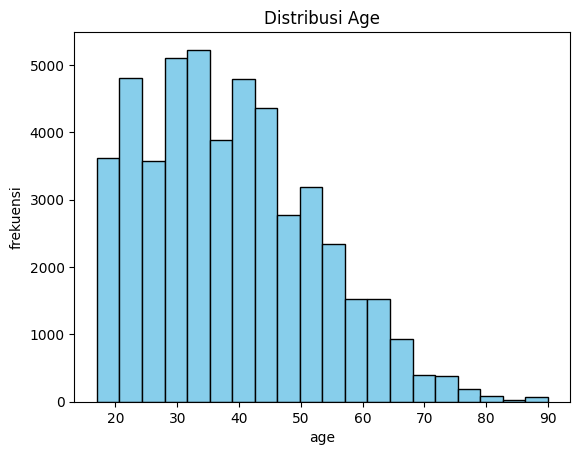

In [113]:
# Jawab 1.1 - Histrogram

plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Age')
plt.xlabel('age')
plt.ylabel('frekuensi')
plt.show()

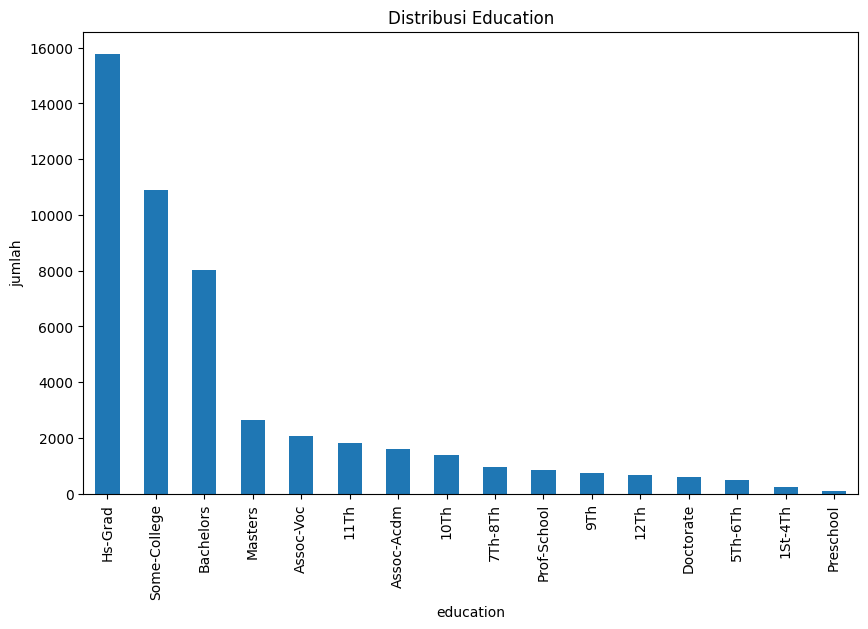

In [114]:
# Jawab 1.2 - Barchart

education = df['education'].value_counts()

plt.figure(figsize=(10,6))
education.plot(kind='bar')
plt.title("Distribusi Education")
plt.xlabel("education")
plt.ylabel("jumlah")
plt.xticks(rotation=90)
plt.show()

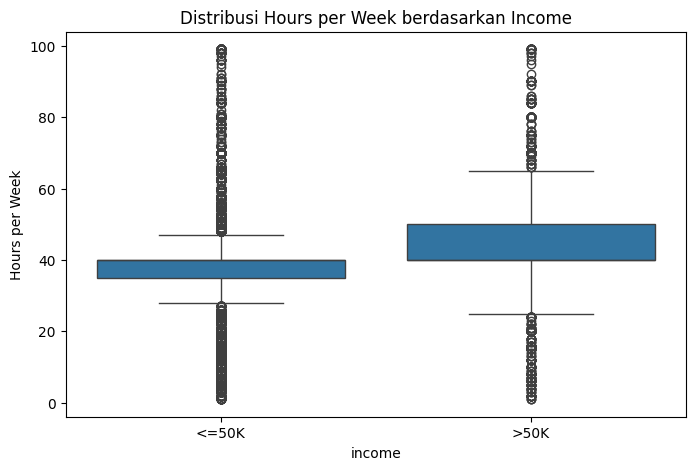

In [115]:
# Jawab 1.3 - Boxplot

plt.figure(figsize=(8,5))
sns.boxplot(x="income", y="hours-per-week", data=df)

plt.title("Distribusi Hours per Week berdasarkan Income")
plt.xlabel("income")
plt.ylabel("Hours per Week")
plt.show()

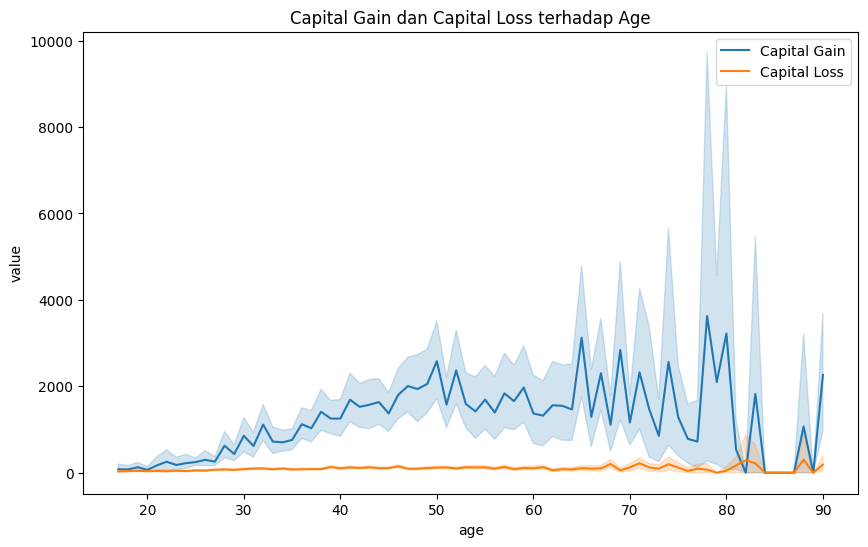

In [116]:
# Jawab 1.4 - Lineplot

plt.figure(figsize=(10,6))

# plot capital-gain
sns.lineplot(x="age", y="capital-gain", data=df, label="Capital Gain")
# plot capital-loss
sns.lineplot(x="age", y="capital-loss", data=df, label="Capital Loss")

plt.title("Capital Gain dan Capital Loss terhadap Age")
plt.xlabel("age")
plt.ylabel("value")
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [117]:
# Jawaban

'''
  1. jadi sebagian besar data berada pada usia 20–50 tahun, dengan puncak pada 25–40 tahun dan setelah usia 50 tahun jumlah data menurun tajam. Distribusi condong ke kanan yang menandakan mayoritas individu dalam dataset berada pada kelompok usia muda hingga paruh baya.
  2. jika terdapat data hilang pada age, akan menggunakan imputasi median karena lebih tahan terhadap outlier dibandingkan mean.
  3. Kategori >50K memiliki outlier lebih banyak, terutama pada jam kerja sangat tinggi (mendekati 100 jam/minggu).
'''

'\n  1. jadi sebagian besar data berada pada usia 20–50 tahun, dengan puncak pada 25–40 tahun dan setelah usia 50 tahun jumlah data menurun tajam. Distribusi condong ke kanan yang menandakan mayoritas individu dalam dataset berada pada kelompok usia muda hingga paruh baya.\n  2. jika terdapat data hilang pada age, akan menggunakan imputasi median karena lebih tahan terhadap outlier dibandingkan mean.\n  3. Kategori >50K memiliki outlier lebih banyak, terutama pada jam kerja sangat tinggi (mendekati 100 jam/minggu).\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [119]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

# output
print(df[['sex', 'income']].head())

   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


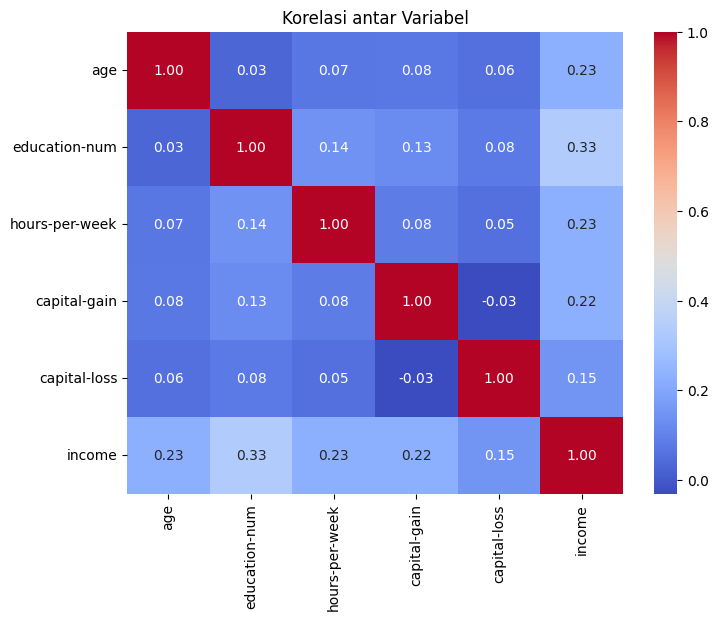

In [120]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

correlation = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']

# matriks korelasi
corr_matrix = df[correlation].corr()

print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Variabel")
plt.show()

In [121]:
# Hasil analisis jelaskan pada cell ini
'''
  1. berdasarkan hasil korelasi tersebut, education-num memiliki hubungan paling kuat dengan income (0,33), artinya semakin tinggi pendidikan maka peluang pendapatan >50K meningkat dan variabel age, hours-per-week, dan capital-gain juga berkorelasi positif sedang terhadap income(sekitar 0,22–0,23), sedangkan capital-loss hanya lemah (0,15). Jadi dapat disimpulkan bahwa pendidikan menjadi faktor yang paling berhubungan dengan pendapatan.
'''

'\n  1. berdasarkan hasil korelasi tersebut, education-num memiliki hubungan paling kuat dengan income (0,33), artinya semakin tinggi pendidikan maka peluang pendapatan >50K meningkat dan variabel age, hours-per-week, dan capital-gain juga berkorelasi positif sedang terhadap income(sekitar 0,22–0,23), sedangkan capital-loss hanya lemah (0,15). Jadi dapat disimpulkan bahwa pendidikan menjadi faktor yang paling berhubungan dengan pendapatan.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [122]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


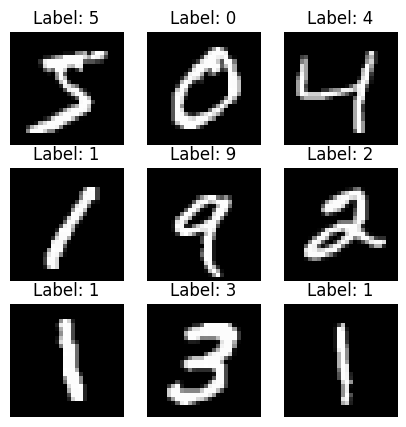

In [123]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [128]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2

# load data
(_, _), (X_test, y_test) = mnist.load_data()
print("Before resize:", X_test.shape)

X_test_resized = np.zeros((X_test.shape[0], 32, 32), dtype=np.uint8)

# resize data test
for i in range(X_test.shape[0]):
    X_test_resized[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("After resize:", X_test_resized.shape)

Before resize: (10000, 28, 28)
After resize: (10000, 32, 32)


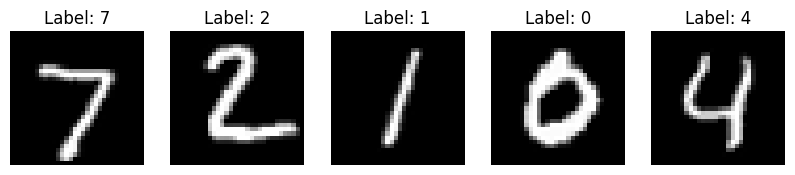

In [129]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [130]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_test_normalisasi = X_test_resized.astype("float32") / 255.0

print("Before normalization:", X_test_resized.min(), "-", X_test_resized.max())
print("After normalization:", X_test_normalisasi.min(), "-", X_test_normalisasi.max())

Before normalization: 0 - 255
After normalization: 0.0 - 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [132]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

print("Shape sebelum flatten:", X_test_normalisasi.shape)

X_test_flatten = np.zeros((X_test_normalisasi.shape[0], 32*32))

for i in range(X_test_normalisasi.shape[0]):
    X_test_flatten[i] = X_test_normalisasi[i].flatten()

print("Shape setelah flatten:", X_test_flatten.shape)

print("\nContoh array flatten dari citra pertama:")
print(X_test_flatten[0][:1000])

Shape sebelum flatten: (10000, 32, 32)
Shape setelah flatten: (10000, 1024)

Contoh array flatten dari citra pertama:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         